In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
pd.set_option('display.max_colwidth', 1000)

In [4]:
reuters_df=pd.read_csv("reuters_df.csv")
reuters_df.head()

,ReviewID,ReviewTime,Review
0,5.862830e+17,Thu Apr 09 21:40:16 +0000 2015,los angeles close 500 medical marijuana shop
1,5.862790e+17,Thu Apr 09 21:24:27 +0000 2015,u cut poultry export forecast deadly bird flu spread
2,5.862730e+17,Thu Apr 09 21:04:15 +0000 2015,fear roundup herbicide residue prompt private testing
3,5.862550e+17,Thu Apr 09 19:49:50 +0000 2015,liberia watchdog say ebola fund unaccounted
4,5.862440e+17,Thu Apr 09 19:07:10 +0000 2015,diabetes device may interfere avalanche beacon signal


In [5]:
reuters_string = " ".join(review for review in reuters_df["Review"])
reuters_string[0:20]

'los angeles close 50'

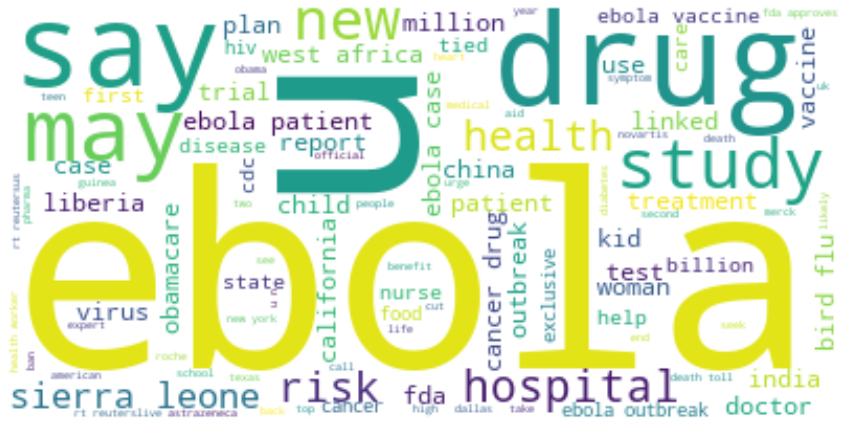

In [6]:
reuters_wordcloud = WordCloud(background_color="white", 
                              max_words=100, 
                             ).generate(reuters_string)

# view the wordcloud
plt.figure(figsize=(15,8) )
plt.imshow(reuters_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [7]:
from collections import Counter
r_words=reuters_string.split()
r_word_freq=Counter(r_words)
five_most_common=r_word_freq.most_common(5)
five_most_common    

[('ebola', 1343), ('u', 718), ('drug', 525), ('may', 318), ('say', 270)]

In [21]:
# create a Pandas dataframe containing the tokens 
# (words) and their frequencies
r_freq_df = pd.DataFrame.from_dict(r_word_freq, orient='index').reset_index()

# rename the columns to "word" and "freq"
r_freq_df.columns=["word", "freq"]

# sort the dataframe so that the most frequent word is 
# at the top and view the first 3 rows
r_freq_df.sort_values(by="freq", ascending=False).head(10)

,word,freq
26,ebola,1343
7,u,718
200,drug,525
31,may,318
25,say,270
378,study,259
191,health,241
227,patient,232
56,cancer,216
141,new,205


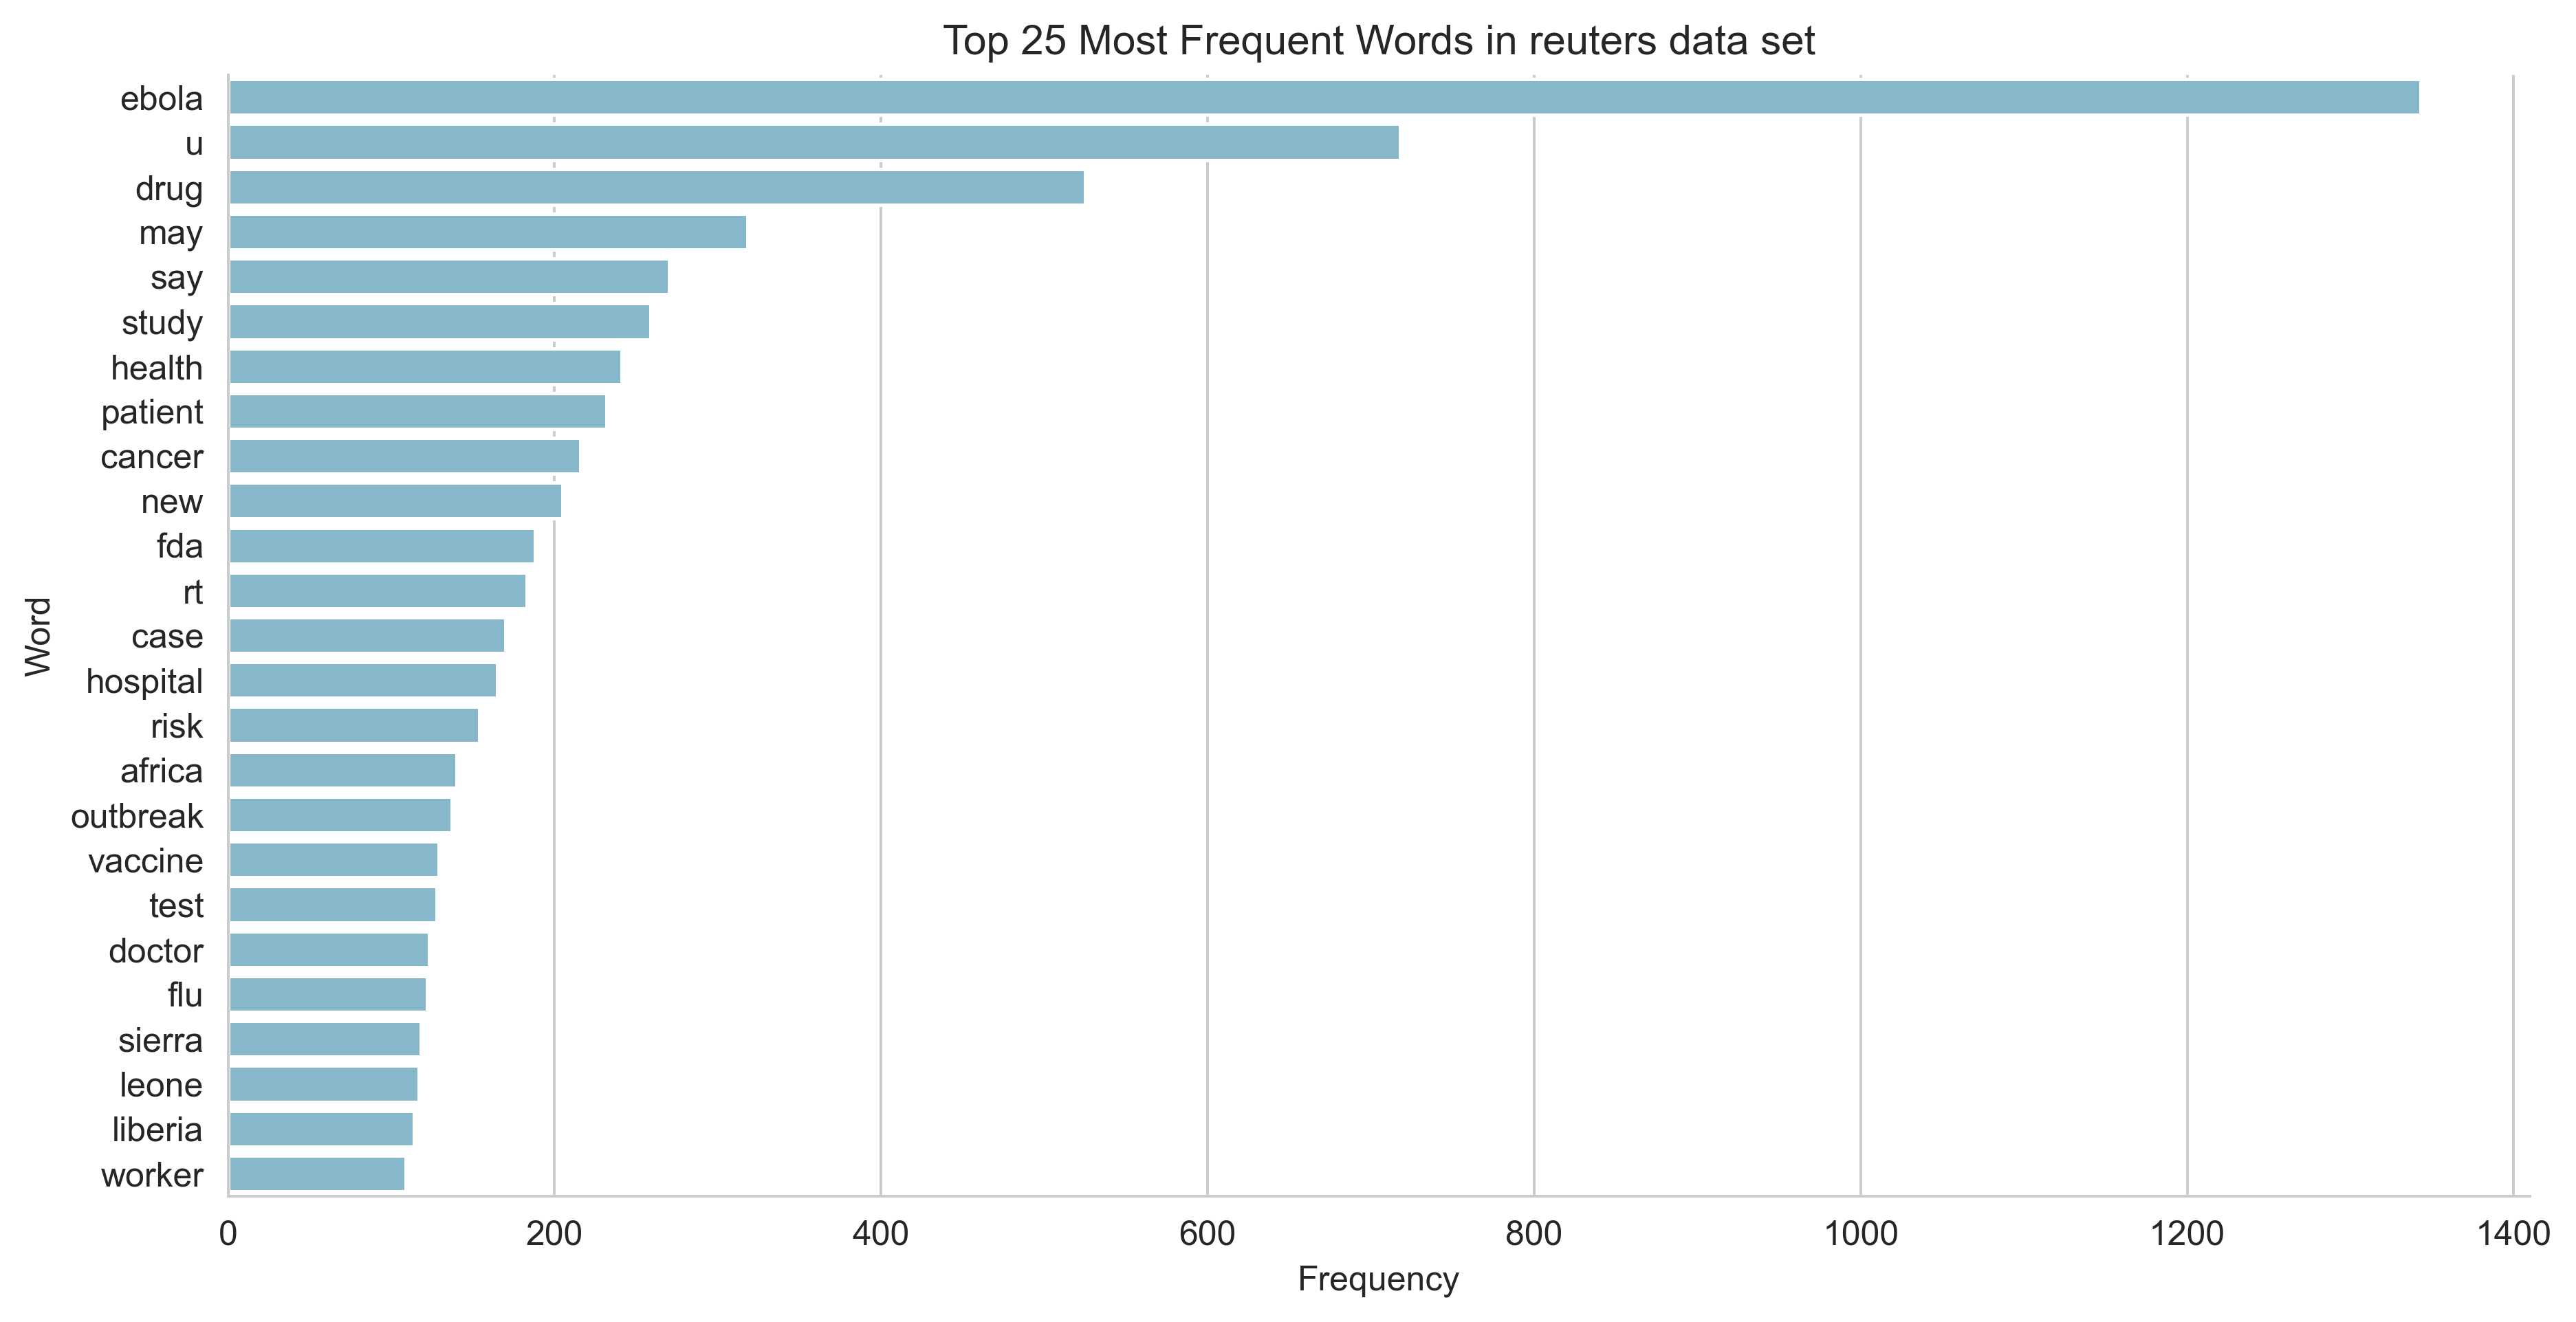

In [22]:
import seaborn as sns
sns.set_style("whitegrid");   # chart background style
plt.rcParams['figure.dpi'] = 360
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=r_freq_df.sort_values(by="freq", ascending=False).head(25),
            y="word",
            x="freq", 
            color='#7bbcd5')
plt.ylabel("Word")
plt.xlabel("Frequency")
plt.title("Top 25 Most Frequent Words in reuters data set")
sns.despine()

In [19]:
#color palette
colors=sns.color_palette("husl", 8)
colors

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.9603888539940703, 0.3814317878772117, 0.8683117650835491)]

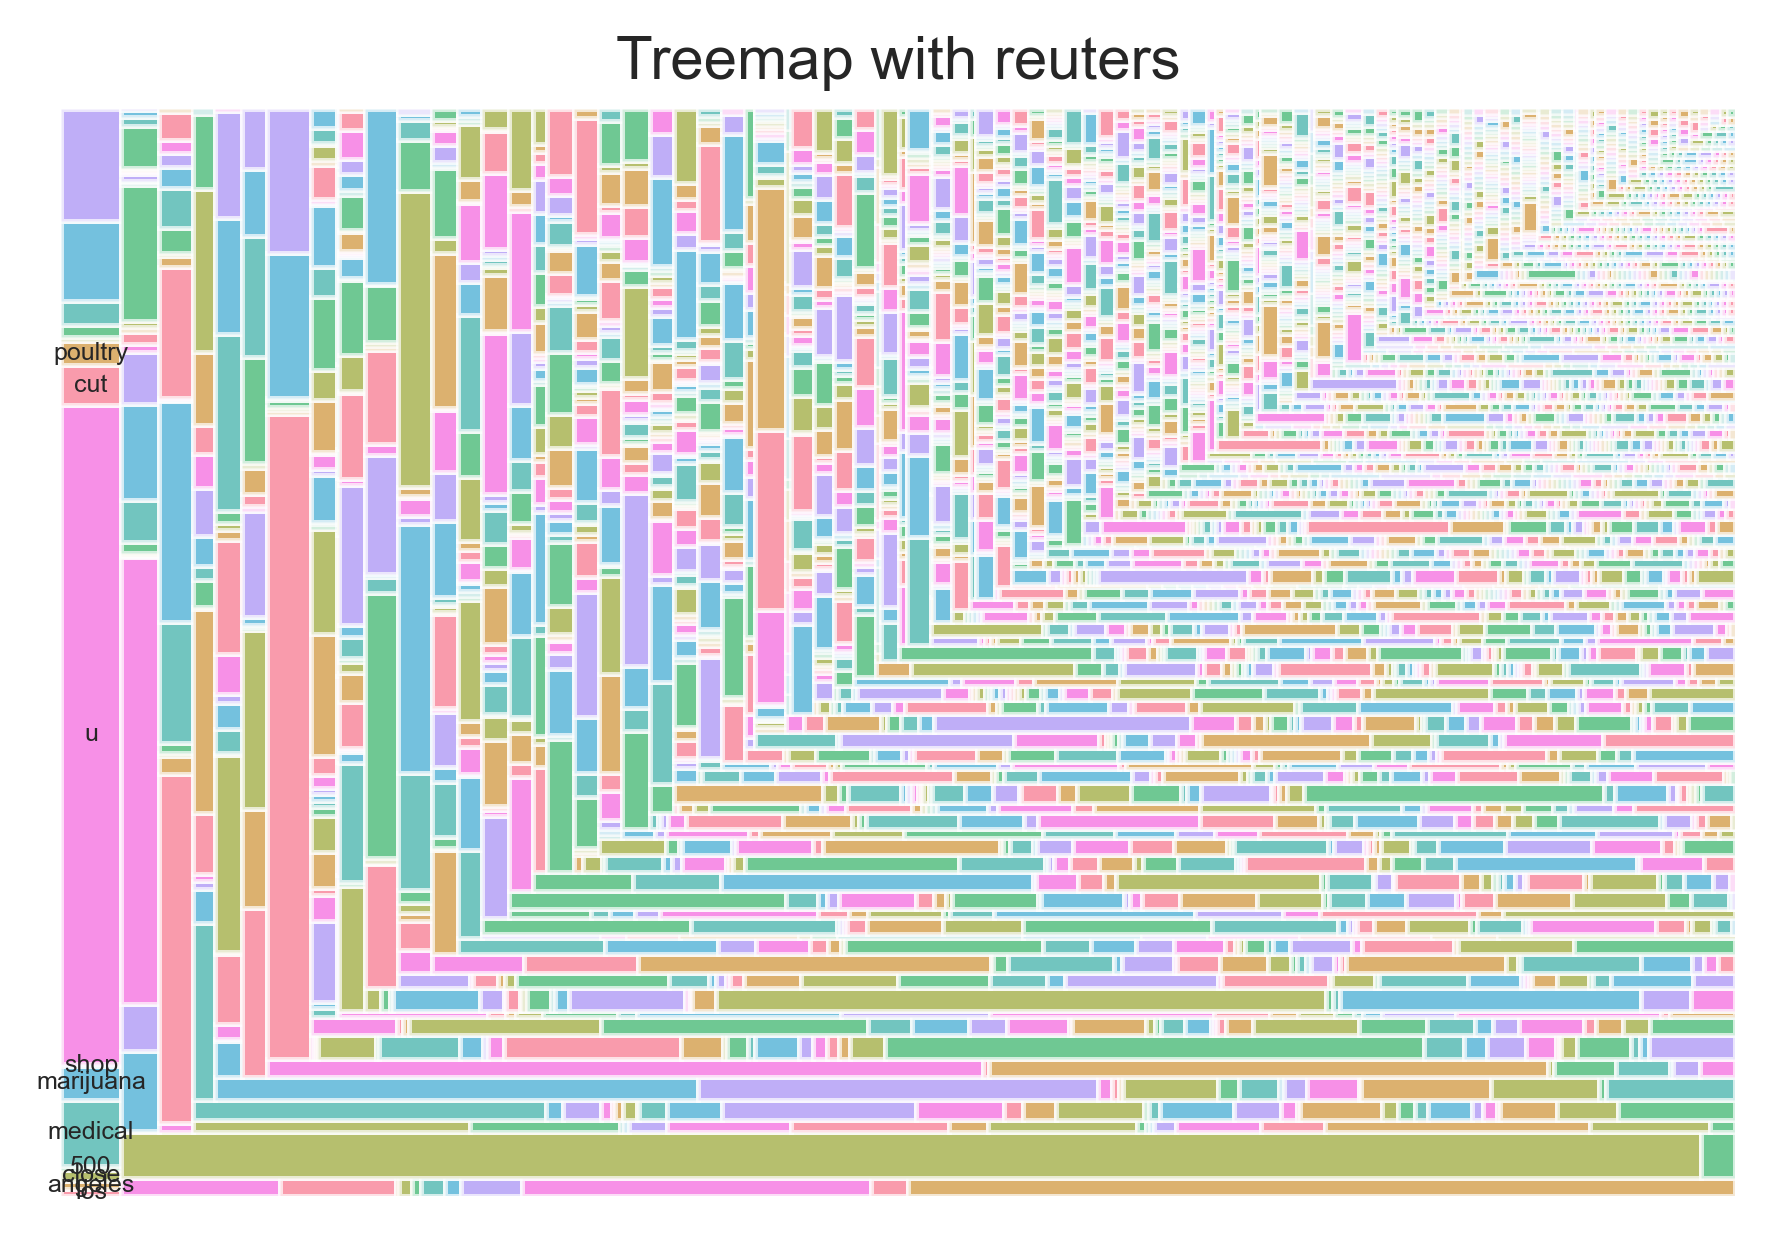

In [20]:
# TreeMap
import squarify
sns.set_style(style="whitegrid") # set seaborn plot style
sizes= r_freq_df["freq"].values# proportions of the categories
label=r_freq_df["word"][:10]
squarify.plot(sizes=sizes, label=label, alpha=0.7,color=colors, text_kwargs={'fontsize':5}).set(title='Treemap with reuters')
plt.axis('off')
plt.show()